Support Vector Machines

By: Maddy

SVM:
-> Linear

-> RBF 

Vectorization:

-> BOW

-> TFIDF

-> AVG W2V

-> TFIDF W2v


In [4]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
import sqlite3
import nltk
import string
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm
import os
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import wordcloud
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import math


In [9]:
if os.path.isfile('final.sqlite'):
    conn = sqlite3.connect('final.sqlite')
    final = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score !=3 limit 80000""", conn)
    conn.close()
else:
    print("Please the above cell")

In [10]:
final.sort_values('Time')
#print (final.sort_values('Time'))

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
30,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
424,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
330,346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
423,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...
245,346116,374422,B00004CI84,A1048CYU0OV4O8,Judy L. Eans,2,2,positive,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,one movi movi collect fill comedi action whate...
308,346041,374343,B00004CI84,A1B2IZU1JLZA6,Wes,19,23,negative,948240000,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",alway enjoy movi funni entertain didnt hesit p...
215,70688,76882,B00002N8SM,A32DW342WBJ6BX,Buttersugar,0,0,positive,948672000,A sure death for flies,I bought a few of these after my apartment was...,bought apart infest fruit fli hour trap mani f...
261,346141,374450,B00004CI84,ACJR7EQF9S6FP,Jeremy Robertson,2,3,positive,951523200,Bettlejuice...Bettlejuice...BETTLEJUICE!,What happens when you say his name three times...,happen say name three time michael keaten star...
325,346094,374400,B00004CI84,A2DEE7F9XKP3ZR,jerome,0,3,positive,959990400,Research - Beatlejuice video - French version,I'm getting crazy.I'm looking for Beatlejuice ...,get crazi look beatlejuic french version video...


In [11]:
print (final.shape)

(80000, 12)


In [12]:
print(final['CleanedText'].values)

['witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg'
 'grew read sendak book watch realli rosi movi incorpor love son love howev miss hard cover version paperback seem kind flimsi take two hand keep page open'
 'fun way children learn month year learn poem throughout school year like handmot invent poem'
 ...
 'found small can local kroger like small much better deal tasti snack'
 'love snack tasti also qualiti realli good get yummi snack'
 'asian rice cracker mix basic one greater varieti cracker also quit bit larger use one size big gumbal perhap reason instead packag bag cracker simpli burst flavor scare eat whole singl sit']


In [13]:
#Pretty Table
x = PrettyTable(["Vectorizer","Model","alpha","C","gamma","Accuracy","ROC Score"])
print(x)


+------------+-------+-------+---+-------+----------+-----------+
| Vectorizer | Model | alpha | C | gamma | Accuracy | ROC Score |
+------------+-------+-------+---+-------+----------+-----------+
+------------+-------+-------+---+-------+----------+-----------+


#### Bag Of Words Featurization

In [14]:
#Using BOW to vectorize

trainX_data=final['CleanedText'].values[0:51200]
testX_data= final['CleanedText'].values[64000:]
cvX_data=final['CleanedText'].values[51200:64000]
trainY_data=final['Score'].values[0:51200]
testY_data=final['Score'].values[64000:]
cvY_data=final['Score'].values[51200:64000]


#Vectorising train data
count_vect = CountVectorizer()
final_counts_train = count_vect.fit_transform(trainX_data)

feature=count_vect.get_feature_names()

#Vectorising cross validation data
final_counts_cv=count_vect.transform(cvX_data)

#Vectorising test data
final_counts_test=count_vect.transform(testX_data)


In [15]:
X_train=final_counts_train
X_test =final_counts_test
X_cv=final_counts_cv
y_train=trainY_data
y_test=testY_data
y_cv=cvY_data


In [16]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(y_train)
y_cv = pd.Series(y_cv)
y_test = pd.Series(y_test)
y_train=y_train.map(z)
y_cv = y_cv.map(z)
y_test = y_test.map(z)

### SVM Linear Kernel On BOW

In [17]:
#Hyperparameter range
alphalist=[]

for i in range(-4,4):
    alphalist.append(10**i)


CV accuracy for alpha = 0.000100 is 91.718750%

CV accuracy for alpha = 0.001000 is 91.953125%

CV accuracy for alpha = 0.010000 is 91.460938%

CV accuracy for alpha = 0.100000 is 86.546875%

CV accuracy for alpha = 1.000000 is 85.742188%

CV accuracy for alpha = 10.000000 is 85.742188%

CV accuracy for alpha = 100.000000 is 85.742188%

CV accuracy for alpha = 1000.000000 is 85.742188%


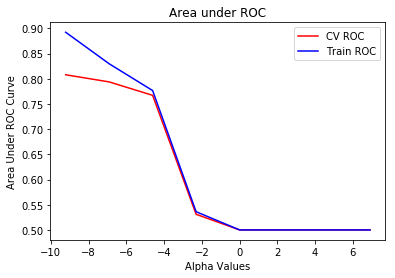

In [18]:
#Running Linear SVM
alpha = 0
roc_sc = 0.0
roc_list_cv = []
roc_list_train = []
for i in alphalist:
    clf = SGDClassifier(alpha=i,loss='hinge',penalty='l2',max_iter=1000)
    clf.fit(X_train, y_train)
    cali = CalibratedClassifierCV(base_estimator=clf,cv='prefit')
    cali.fit(X_train,y_train)
    pred_train = cali.predict(X_train)
    pred_cv = cali.predict(X_cv)
    roc_score_train = roc_auc_score(y_train,pred_train)
    roc_score_cv = roc_auc_score(y_cv, pred_cv)
    roc_list_cv.append(roc_score_cv)
    roc_list_train.append(roc_score_train)
    acc = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
    print('\nCV accuracy for alpha = %f is %f%%' % (i, acc))
    if (roc_sc<=roc_score_cv):
        roc_sc=roc_score_cv
        alpha=i
    else:
        pass

alphalist1 = [math.log(i) for i in alphalist]
plt.figure()
plt.plot(alphalist1,roc_list_cv,'r',label='CV ROC')
plt.plot(alphalist1,roc_list_train,'b',label='Train ROC')
plt.title("Area under ROC")
plt.xlabel("Alpha Values")
plt.ylabel("Area Under ROC Curve")
plt.legend()
plt.show()    

The most optimal value of alpha is 0.000100

Test accuracy for alpha = 0.000100 is 92.368750%

 Test ROC Score is  0.813779376525148


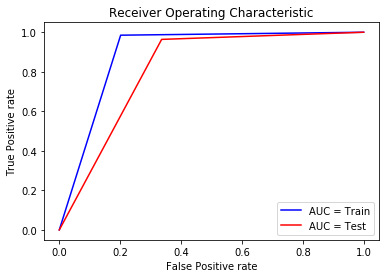

In [19]:
print("The most optimal value of alpha is %f" %(alpha))

clf = SGDClassifier(alpha=alpha,loss='hinge',penalty='l2',max_iter=1000)
clf.fit(X_train, y_train)
cali = CalibratedClassifierCV(base_estimator=clf,cv='prefit')
cali.fit(X_train,y_train)
pred_train = cali.predict(X_train)
pred_test = cali.predict(X_test)
acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)

print('\nTest accuracy for alpha = %f is %f%%' % (alpha, acc))

roc_score_test = roc_auc_score(y_test,pred_test)
print('\n Test ROC Score is ',roc_score_test)
fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test)
x.add_row(['BOW','Linear SVM',alpha,"---","---",acc,roc_score_test])
plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()


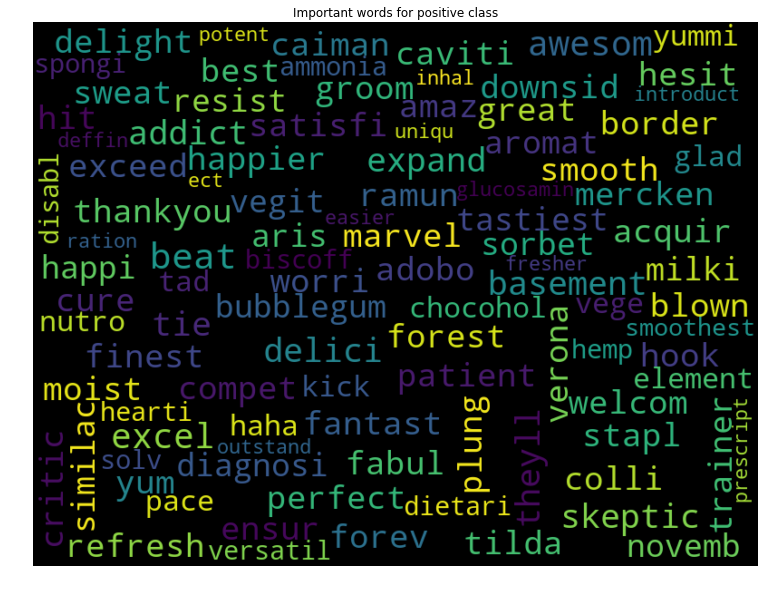

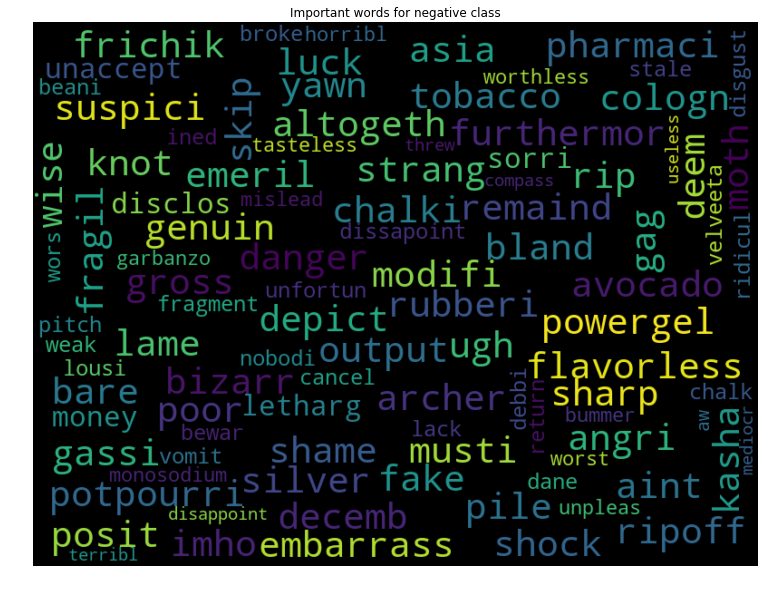

In [20]:
dictnegative={}
dictpositive={}
coefs_with_fns = sorted(zip(clf.coef_[0], feature))
top = zip(coefs_with_fns[:100], coefs_with_fns[:-(100 + 1):-1])
for (coef_1, fn_1), (coef_2, fn_2) in top:
    dictnegative[fn_1]=coef_1
    dictpositive[fn_2]=coef_2
wc=wordcloud.WordCloud(width=800, height=600,max_font_size=40,background_color="black", max_words=1000)

wc.generate_from_frequencies(dictpositive)
plt.figure( figsize=(20,10) )
plt.title("Important words for positive class")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

wc.generate_from_frequencies(dictnegative)
plt.figure( figsize=(20,10) )
plt.title("Important words for negative class")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


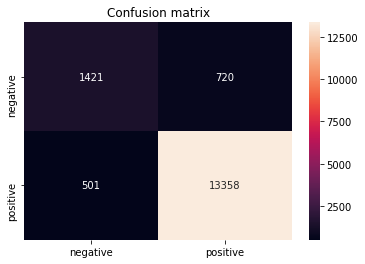

In [21]:
#Confusion Matrix
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

### Working With RBF Kernel on BOW

In [22]:
#Using BOW to vectorize

trainX_data=final['CleanedText'].values[0:30000]
testX_data= final['CleanedText'].values[30000:40000]
trainY_data=final['Score'].values[0:30000]
testY_data=final['Score'].values[30000:40000]



#Vectorising train data
count_vect = CountVectorizer(min_df = 10,max_features = 500)
final_counts_train = count_vect.fit_transform(trainX_data)

feature=count_vect.get_feature_names()

final_counts_test=count_vect.transform(testX_data)





In [23]:
X_train=final_counts_train
X_test =final_counts_test
y_train=trainY_data
y_test=testY_data

In [24]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
y_train=y_train.map(z)
y_test = y_test.map(z)

In [25]:
#Hyperparameter Range
gamma=[]
c=[]

for i in range(-4,4):
    c.append(10**i)
    gamma.append(10**i)


Best hyperparameter C is 1
Best hyperparameter gamma is 0.01

 Test ROC Score  is  0.630769712983005

 Test accuracy 87.050000%


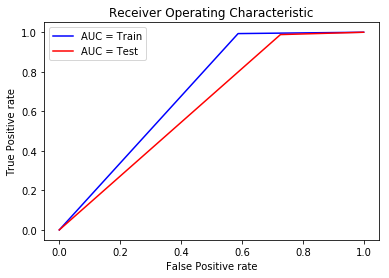

In [26]:
#Applying RBF Kernel on BOW
#Grid Search

parameters = {'gamma':gamma, 'C':c}
svc=svm.SVC(kernel="rbf")
clf = GridSearchCV(svc, parameters, cv=2,scoring='roc_auc')
clf.fit(X_train, y_train)
param=clf.best_params_
pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)
roc_score_test = roc_auc_score(y_test,pred_test)

param = clf.best_params_
bestC= param['C']
bestgamma = param['gamma']
print ('Best hyperparameter C is',bestC)
print('Best hyperparameter gamma is',bestgamma)
print('\n Test ROC Score  is ',roc_score_test)

acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)

print('\n Test accuracy %f%%' %(acc))

fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test)
x.add_row(['BOW','RBF SVM',"---",bestC,bestgamma,acc,roc_score_test])

plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()


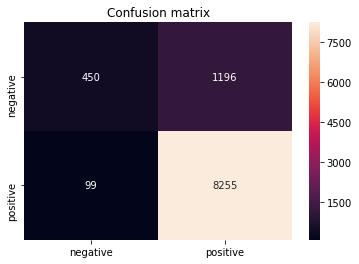

In [27]:
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

### TF-IDF Featurization

In [28]:
import warnings
warnings.filterwarnings("ignore")
#Vectorizing using TFIDF
#TF IDF Vectorizing


trainX_data=final['CleanedText'].values[0:46400]
testX_data= final['CleanedText'].values[58000:70000]
cvX_data=final['CleanedText'].values[46400:58000]
trainY_data=final['Score'].values[0:46400]
testY_data=final['Score'].values[58000:70000]
cvY_data=final['Score'].values[46400:58000]


tf_idf_vect = TfidfVectorizer(max_features=2000,min_df=50)
final_tf_idf_train = tf_idf_vect.fit_transform(trainX_data)

feature=tf_idf_vect.get_feature_names()

    
final_tf_idf_test=tf_idf_vect.transform(testX_data)
 

final_tf_idf_cv=tf_idf_vect.transform(cvX_data)


In [29]:
import warnings
warnings.filterwarnings("ignore")
X_train=final_tf_idf_train
X_test =final_tf_idf_test
X_cv=final_tf_idf_cv
y_train=trainY_data
y_test=testY_data
y_cv=cvY_data

In [30]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(y_train)
y_cv = pd.Series(y_cv)
y_test = pd.Series(y_test)
y_train=y_train.map(z)
y_cv = y_cv.map(z)
y_test = y_test.map(z)

In [31]:
alphalist=[]

for i in range(-4,4):
    alphalist.append(10**i)


CV accuracy for alpha = 0.000100 is 92.500000%

CV accuracy for alpha = 0.001000 is 92.155172%

CV accuracy for alpha = 0.010000 is 92.146552%

CV accuracy for alpha = 0.100000 is 87.155172%

CV accuracy for alpha = 1.000000 is 86.112069%

CV accuracy for alpha = 10.000000 is 86.112069%

CV accuracy for alpha = 100.000000 is 86.112069%

CV accuracy for alpha = 1000.000000 is 86.112069%


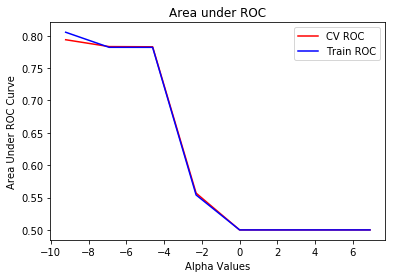

In [32]:
alpha = 0
roc_sc = 0.0
roc_list_cv = []
roc_list_train = []
for i in alphalist:
    clf = SGDClassifier(alpha=i,loss='hinge',penalty='l2',max_iter=1000)
    clf.fit(X_train, y_train)
    cali = CalibratedClassifierCV(base_estimator=clf,cv='prefit')
    cali.fit(X_train,y_train)
    pred_train = cali.predict(X_train)
    pred_cv = cali.predict(X_cv)
    roc_score_train = roc_auc_score(y_train,pred_train)
    roc_score_cv = roc_auc_score(y_cv, pred_cv)
    roc_list_cv.append(roc_score_cv)
    roc_list_train.append(roc_score_train)
    acc = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
    print('\nCV accuracy for alpha = %f is %f%%' % (i, acc))
    if (roc_sc<=roc_score_cv):
        roc_sc=roc_score_cv
        alpha=i
    else:
        pass
    
alphalist1 = [math.log(i) for i in alphalist]
plt.figure()
plt.plot(alphalist1,roc_list_cv,'r',label='CV ROC')
plt.plot(alphalist1,roc_list_train,'b',label='Train ROC')
plt.title("Area under ROC")
plt.xlabel("Alpha Values")
plt.ylabel("Area Under ROC Curve")
plt.legend()
plt.show()    

The most optimal value of alpha is 0.000100

Test accuracy for alpha = 0.000100 is 86.112069%

 Test ROC Score is 0.7968524716729567


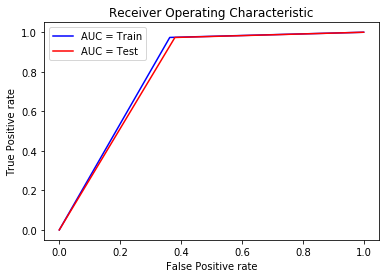

In [33]:
print("The most optimal value of alpha is %f" %(alpha))

clf = SGDClassifier(alpha=alpha,loss='hinge',penalty='l2',max_iter=1000)
clf.fit(X_train, y_train)
cali = CalibratedClassifierCV(base_estimator=clf,cv='prefit')
cali.fit(X_train,y_train)
pred_train = cali.predict(X_train)
pred_test = cali.predict(X_test)
acc = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
print('\nTest accuracy for alpha = %f is %f%%' % (alpha, acc))
roc_score_test = roc_auc_score(y_test,pred_test)
print('\n Test ROC Score is',roc_score_test)
fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test)
x.add_row(['TFIDF','Linear SVM',alpha,"---","---",acc,roc_score_test])
plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()


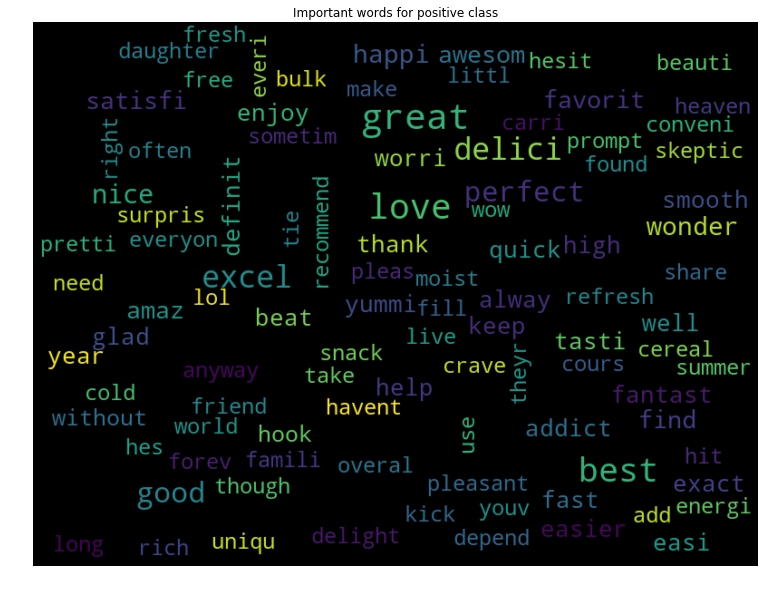

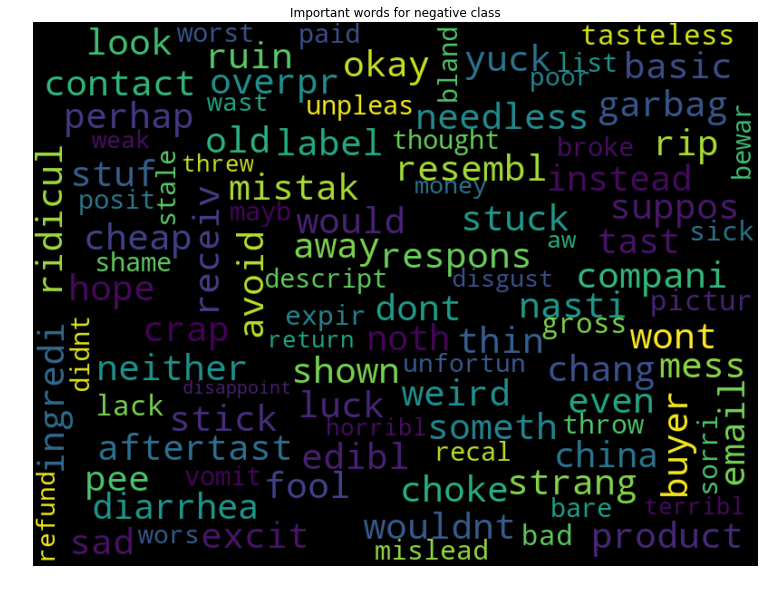

In [34]:
dictnegative={}
dictpositive={}
coefs_with_fns = sorted(zip(clf.coef_[0], feature))
top = zip(coefs_with_fns[:100], coefs_with_fns[:-(100 + 1):-1])
for (coef_1, fn_1), (coef_2, fn_2) in top:
    dictnegative[fn_1]=coef_1
    dictpositive[fn_2]=coef_2
wc=wordcloud.WordCloud(width=800, height=600,max_font_size=40,background_color="black", max_words=1000)

wc.generate_from_frequencies(dictpositive)
plt.figure( figsize=(20,10) )
plt.title("Important words for positive class")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

wc.generate_from_frequencies(dictnegative)
plt.figure( figsize=(20,10) )
plt.title("Important words for negative class")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

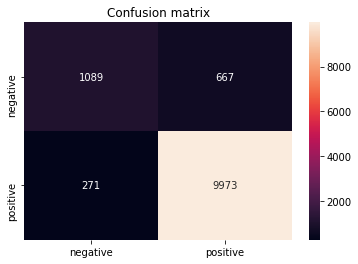

In [35]:
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

### TFIDF With RBF Kernel

In [36]:
import warnings
warnings.filterwarnings("ignore")
#Vectorizing using TFIDF

trainX_data=final['CleanedText'].values[0:30000]
testX_data= final['CleanedText'].values[30000:40000]
trainY_data=final['Score'].values[0:30000]
testY_data=final['Score'].values[30000:40000]


tf_idf_vect = TfidfVectorizer(min_df = 10,max_features = 500)
final_tf_idf_train = tf_idf_vect.fit_transform(trainX_data)

feature=tf_idf_vect.get_feature_names()
    
final_tf_idf_test=tf_idf_vect.transform(testX_data)


In [37]:
import warnings
warnings.filterwarnings("ignore")
X_train=final_tf_idf_train
X_test =final_tf_idf_test
y_train=trainY_data
y_test=testY_data


In [38]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(y_train)
y_cv = pd.Series(y_cv)
y_test = pd.Series(y_test)
y_train=y_train.map(z)
y_cv = y_cv.map(z)
y_test = y_test.map(z)

In [39]:
gamma=[]
c=[]

for i in range(-4,4):
    c.append(10**i)
    gamma.append(10**i)


Best hyperparameter C is 1
Best hyperparameter gamma is 1

 Test ROC Score  is  0.6662222766518379

 Test accuracy 87.920000%


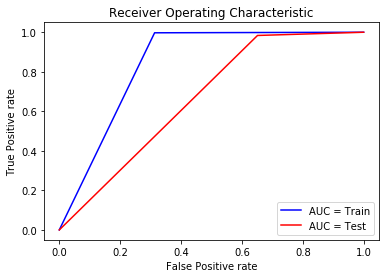

In [40]:
#Applying RBF Kernel on BOW

parameters = {'gamma':gamma, 'C':c}
svc=svm.SVC(kernel="rbf")
clf = GridSearchCV(svc, parameters, cv=2,scoring='roc_auc')
clf.fit(X_train, y_train)
param=clf.best_params_
pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)
roc_score_test = roc_auc_score(y_test,pred_test)

param = clf.best_params_
bestC= param['C']
bestgamma = param['gamma']
print ('Best hyperparameter C is',bestC)
print('Best hyperparameter gamma is',bestgamma)
print('\n Test ROC Score  is ',roc_score_test)

acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)

print('\n Test accuracy %f%%' %(acc))
x.add_row(['TFIDF','RBF SVM',"---",bestC,bestgamma,acc,roc_score_test])
fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test)

plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()


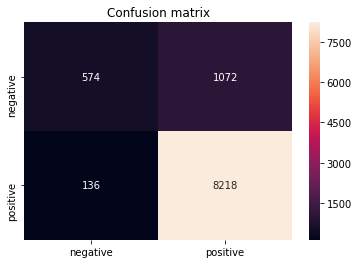

In [41]:
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

### AVG Word To Vec On Linear SVM

In [42]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtrain = final['CleanedText'].values[0:51200]

i=0
list_of_sent=[]
for sent in datawtovtrain:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_train = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0;
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
W2VScoretrain=final['Score'].values[0:51200]



number of words that occured minimum 5 times  9691
sample words  ['littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'watch', 'realli', 'rosi', 'movi', 'incorpor', 'howev', 'miss', 'hard', 'cover', 'version', 'paperback', 'seem', 'kind', 'flimsi', 'take', 'two', 'hand']


100%|███████████████████████████████████████████████████████████████████████████| 51200/51200 [00:57<00:00, 884.30it/s]


51200


In [43]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovcv = final['CleanedText'].values[51200:64000]


i=0
list_of_sent=[]
for sent in datawtovcv:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_cv = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0;
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_cv.append(sent_vec)
print(len(sent_vectors_cv))
W2VScorecv=final['Score'].values[51200:64000]



number of words that occured minimum 5 times  4496
sample words  ['best', 'granola', 'bar', 'ever', 'plus', 'got', 'sale', 'made', 'even', 'better', 'get', 'children', 'eat', 'littl', 'bit', 'fiber', 'realli', 'good', 'cours', 'almond', 'mix', 'nut', 'flavor', 'would', 'give', 'five', 'star', 'found', 'like', 'roast', 'peanut', 'fantast', 'snack', 'sweet', 'crunchi', 'chewi', 'nutti', 'salti', 'usual', 'hate', 'love', 'fan', 'tri', 'recent', 'one', 'breakfast', 'minut', 'ago', 'matter', 'fact']


100%|██████████████████████████████████████████████████████████████████████████| 12800/12800 [00:07<00:00, 1636.46it/s]


12800


In [44]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtest = final['CleanedText'].values[64000:]



i=0
list_of_sent=[]
for sent in datawtovtest:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_test = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0;
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
W2VScoretest=final['Score'].values[64000:]


number of words that occured minimum 5 times  4917
sample words  ['tortellini', 'dri', 'graini', 'come', 'small', 'box', 'couldnt', 'eat', 'flavor', 'strong', 'good', 'end', 'donat', 'remain', 'bought', 'time', 'ago', 'amazon', 'back', 'davinci', 'tri', 'barilla', 'brand', 'find', 'quit', 'tasti', 'lack', 'filler', 'use', 'great', 'butter', 'grate', 'chees', 'various', 'sauc', 'make', 'yummi', 'italian', 'salad', 'cut', 'hard', 'salami', 'chunk', 'pickl', 'veggi', 'marin', 'artichok', 'oliv', 'love', 'eas']


100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [00:10<00:00, 1511.62it/s]


16000


In [45]:
import warnings
warnings.filterwarnings("ignore")

#Train Test Split of W2V data
#creating the model with W2V and brute force KNN
X_train = sent_vectors_train
X_cv=sent_vectors_cv
X_test = sent_vectors_test
Y_train = W2VScoretrain
Y_cv = W2VScorecv
Y_test = W2VScoretest


In [46]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(Y_train)
y_cv = pd.Series(Y_cv)
y_test = pd.Series(Y_test)
y_train=y_train.map(z)
y_cv = y_cv.map(z)
y_test = y_test.map(z)


In [47]:
alphalist=[]

for i in range(-4,4):
    alphalist.append(10**i)


CV accuracy for alpha = 0.000100 is 23.375000%

CV accuracy for alpha = 0.001000 is 29.132812%

CV accuracy for alpha = 0.010000 is 46.726562%

CV accuracy for alpha = 0.100000 is 47.554688%

CV accuracy for alpha = 1.000000 is 47.148438%

CV accuracy for alpha = 10.000000 is 16.515625%

CV accuracy for alpha = 100.000000 is 75.015625%

CV accuracy for alpha = 1000.000000 is 75.015625%


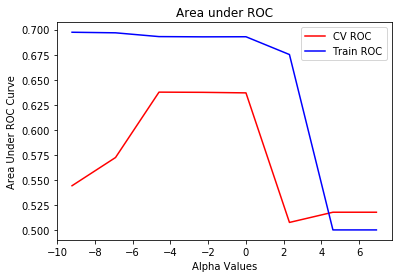

In [48]:
alpha = 0
roc_sc = 0.0
roc_list_cv = []
roc_list_train = []
for i in alphalist:
    clf = SGDClassifier(alpha=i,loss='hinge',penalty='l2',max_iter=1000)
    clf.fit(X_train, y_train)
    cali = CalibratedClassifierCV(base_estimator=clf,cv='prefit')
    cali.fit(X_train,y_train)
    pred_train = cali.predict(X_train)
    pred_cv = cali.predict(X_cv)
    roc_score_train = roc_auc_score(y_train,pred_train)
    roc_score_cv = roc_auc_score(y_cv, pred_cv)
    roc_list_cv.append(roc_score_cv)
    roc_list_train.append(roc_score_train)
    acc = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
    print('\nCV accuracy for alpha = %f is %f%%' % (i, acc))
    if (roc_sc<=roc_score_cv):
        roc_sc=roc_score_cv
        alpha=i
    else:
        pass
    
alphalist1 = [math.log(i) for i in alphalist]
plt.figure()
plt.plot(alphalist1,roc_list_cv,'r',label='CV ROC')
plt.plot(alphalist1,roc_list_train,'b',label='Train ROC')
plt.title("Area under ROC")
plt.xlabel("Alpha Values")
plt.ylabel("Area Under ROC Curve")
plt.legend()
plt.show()    


The most optimal value of alpha is 0.010000

Test accuracy for alpha = 0.010000 is 75.015625%

 Test ROC Score is 0.5472281908818173


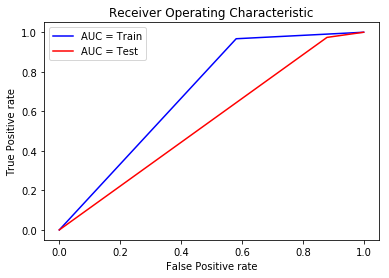

In [49]:
print("The most optimal value of alpha is %f" %(alpha))

clf = SGDClassifier(alpha=alpha,loss='hinge',penalty='l2',max_iter=1000)
clf.fit(X_train, y_train)
cali = CalibratedClassifierCV(base_estimator=clf,cv='prefit')
cali.fit(X_train,y_train)
pred_train = cali.predict(X_train)
pred_test = cali.predict(X_test)
acc = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
print('\nTest accuracy for alpha = %f is %f%%' % (alpha, acc))
roc_score_test = roc_auc_score(y_test,pred_test)
print('\n Test ROC Score is',roc_score_test)
x.add_row(['AVG W2V','Linear SVM',alpha,"---","---",acc,roc_score_test])

fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test)

plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()


In [2]:
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")


NameError: name 'confusion_matrix' is not defined

### AVG Word To Vec :SVM RBF Kernel

In [51]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtrain = final['CleanedText'].values[0:30000]

i=0
list_of_sent=[]
for sent in datawtovtrain:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_train = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0;
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
W2VScoretrain=final['Score'].values[0:30000]



number of words that occured minimum 5 times  8131
sample words  ['littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'watch', 'realli', 'rosi', 'movi', 'incorpor', 'howev', 'miss', 'hard', 'cover', 'version', 'paperback', 'seem', 'kind', 'flimsi', 'take', 'two', 'hand', 'keep']


100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [00:33<00:00, 882.47it/s]


30000


In [52]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtest = final['CleanedText'].values[30000:40000]


i=0
list_of_sent=[]
for sent in datawtovtest:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_test = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0;
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
W2VScoretest=final['Score'].values[30000:40000]


number of words that occured minimum 5 times  4179
sample words  ['dog', 'love', 'much', 'tip', 'bag', 'tri', 'finish', 'pack', 'caught', 'never', 'usual', 'treat', 'put', 'insid', 'everlast', 'ball', 'get', 'first', 'cooki', 'flavor', 'vari', 'doesnt', 'tire', 'bore', 'tast', 'also', 'divid', 'half', 'make', 'smaller', 'use', 'way', 'train', 'great', 'product', 'come', 'packag', 'foil', 'stay', 'fresh', 'long', 'period', 'time', 'keep', 'away', 'enough', 'buy', 'like', 'wish', 'came']


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1345.61it/s]


10000


In [53]:
import warnings
warnings.filterwarnings("ignore")

#Train Test Split of W2V data
#creating the model with W2V and brute force KNN
X_train = sent_vectors_train
X_test = sent_vectors_test
Y_train = W2VScoretrain
Y_test = W2VScoretest

In [54]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(Y_train)
y_test = pd.Series(Y_test)
y_train=y_train.map(z)
y_test = y_test.map(z)

In [55]:
gamma=[]
c=[]

for i in range(-4,4):
    c.append(10**i)
    gamma.append(10**i)

Best hyperparameter C is 10
Best hyperparameter gamma is 0.01

 Test ROC Score  is  0.5024436602571916

 Test accuracy 83.500000%


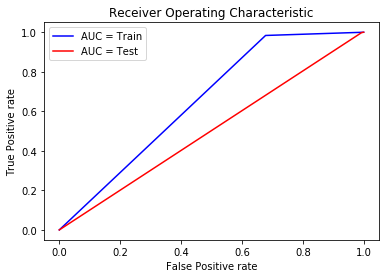

In [56]:
#Applying RBF Kernel on BOW

parameters = {'gamma':gamma, 'C':c}
svc=svm.SVC(kernel="rbf")
clf = GridSearchCV(svc, parameters, cv=2,scoring='roc_auc')
clf.fit(X_train, y_train)
param=clf.best_params_
pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)
roc_score_test = roc_auc_score(y_test,pred_test)

param = clf.best_params_
bestC= param['C']
bestgamma = param['gamma']
print ('Best hyperparameter C is',bestC)
print('Best hyperparameter gamma is',bestgamma)
print('\n Test ROC Score  is ',roc_score_test)

acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)

print('\n Test accuracy %f%%' %(acc))
x.add_row(['AVG W2V','RBF SVM',"---",bestC,bestgamma,acc,roc_score_test])

fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test)

plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()


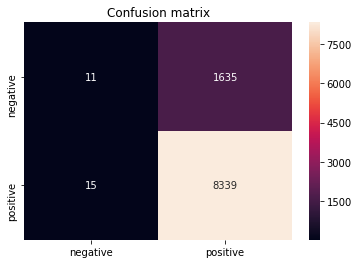

In [57]:
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

#### TFIDF WORD TO VEC Linear SVM

In [58]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtrain = final['CleanedText'].values[0:51200]


i=0
list_of_sent=[]
for sent in datawtovtrain:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_train = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
W2VScoretrain=final['Score'].values[0:51200]


number of words that occured minimum 5 times  9691
sample words  ['littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'watch', 'realli', 'rosi', 'movi', 'incorpor', 'howev', 'miss', 'hard', 'cover', 'version', 'paperback', 'seem', 'kind', 'flimsi', 'take', 'two', 'hand']


100%|███████████████████████████████████████████████████████████████████████████| 51200/51200 [01:50<00:00, 465.35it/s]


51200


In [59]:
#TFIDF WEIGHTED W2V
import warnings
warnings.filterwarnings("ignore")

datatfidftrain = final['CleanedText'].values[0:51200]

model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(datatfidftrain)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [60]:
import warnings
warnings.filterwarnings("ignore")
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names


tfidf_sent_vectors_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]

            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_train.append(sent_vec)
    row += 1
TFIDFW2VScoretrain=final['Score'].values[0:51200]

100%|███████████████████████████████████████████████████████████████████████████| 51200/51200 [01:34<00:00, 540.42it/s]


In [61]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovcv = final['CleanedText'].values[51200:64000]
i=0
list_of_sent=[]
for sent in datawtovcv:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_cv = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors_cv.append(sent_vec)
print(len(sent_vectors_cv))

W2VScorecv=final['Score'].values[51200:64000]

number of words that occured minimum 5 times  4496
sample words  ['best', 'granola', 'bar', 'ever', 'plus', 'got', 'sale', 'made', 'even', 'better', 'get', 'children', 'eat', 'littl', 'bit', 'fiber', 'realli', 'good', 'cours', 'almond', 'mix', 'nut', 'flavor', 'would', 'give', 'five', 'star', 'found', 'like', 'roast', 'peanut', 'fantast', 'snack', 'sweet', 'crunchi', 'chewi', 'nutti', 'salti', 'usual', 'hate', 'love', 'fan', 'tri', 'recent', 'one', 'breakfast', 'minut', 'ago', 'matter', 'fact']


100%|██████████████████████████████████████████████████████████████████████████| 12800/12800 [00:10<00:00, 1199.54it/s]


12800


In [62]:
#TFIDF WEIGHTED W2V
import warnings
warnings.filterwarnings("ignore")

datatfidfcv = final['CleanedText'].values[51200:64000]

model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(datatfidfcv)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [63]:
import warnings
warnings.filterwarnings("ignore")
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names


tfidf_sent_vectors_cv = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_cv.append(sent_vec)
    row += 1
print(len(tfidf_sent_vectors_cv))
TFIDFW2VScorecv=final['Score'].values[51200:64000]

100%|███████████████████████████████████████████████████████████████████████████| 12800/12800 [00:14<00:00, 874.69it/s]


12800


In [64]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtest = final['CleanedText'].values[64000:]

i=0
list_of_sent=[]
for sent in datawtovtest:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_test = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
W2VScoretest=final['Score'].values[64000:]



number of words that occured minimum 5 times  4917
sample words  ['tortellini', 'dri', 'graini', 'come', 'small', 'box', 'couldnt', 'eat', 'flavor', 'strong', 'good', 'end', 'donat', 'remain', 'bought', 'time', 'ago', 'amazon', 'back', 'davinci', 'tri', 'barilla', 'brand', 'find', 'quit', 'tasti', 'lack', 'filler', 'use', 'great', 'butter', 'grate', 'chees', 'various', 'sauc', 'make', 'yummi', 'italian', 'salad', 'cut', 'hard', 'salami', 'chunk', 'pickl', 'veggi', 'marin', 'artichok', 'oliv', 'love', 'eas']


100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [00:12<00:00, 1254.99it/s]


16000


In [65]:
#TFIDF WEIGHTED W2V
import warnings
warnings.filterwarnings("ignore")

datatfidftest = final['CleanedText'].values[64000:]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(datatfidftest)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [66]:
import warnings
warnings.filterwarnings("ignore")
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names


tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1
TFIDFW2VScoretest=final['Score'].values[64000:]


100%|███████████████████████████████████████████████████████████████████████████| 16000/16000 [00:23<00:00, 686.55it/s]


In [67]:
import warnings
warnings.filterwarnings("ignore")
#Train Test Split of TFIDF W2V data
#creating the model with TFIDF W2V and brute force KNN
X_train = tfidf_sent_vectors_train
X_test = tfidf_sent_vectors_test
X_cv = tfidf_sent_vectors_cv
Y_train = TFIDFW2VScoretrain
Y_test = TFIDFW2VScoretest
Y_cv =TFIDFW2VScorecv

In [68]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(Y_train)
y_cv = pd.Series(Y_cv)
y_test = pd.Series(Y_test)
y_train=y_train.map(z)
y_cv = y_cv.map(z)
y_test = y_test.map(z)

In [69]:
alphalist=[]

for i in range(-4,4):
    alphalist.append(10**i)


CV accuracy for alpha = 0.000100 is 43.953125%

CV accuracy for alpha = 0.001000 is 50.257812%

CV accuracy for alpha = 0.010000 is 52.539062%

CV accuracy for alpha = 0.100000 is 52.906250%

CV accuracy for alpha = 1.000000 is 52.664062%

CV accuracy for alpha = 10.000000 is 21.468750%

CV accuracy for alpha = 100.000000 is 85.695312%

CV accuracy for alpha = 1000.000000 is 85.695312%


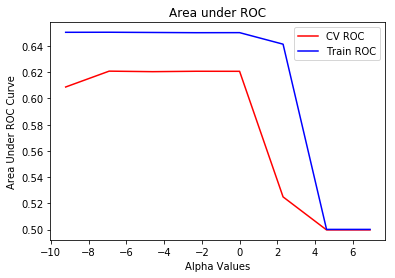

In [70]:
alpha = 0
roc_sc = 0.0
roc_list_cv = []
roc_list_train = []
for i in alphalist:
    clf = SGDClassifier(alpha=i,loss='hinge',penalty='l2',max_iter=1000)
    clf.fit(X_train, y_train)
    cali = CalibratedClassifierCV(base_estimator=clf,cv='prefit')
    cali.fit(X_train,y_train)
    pred_train = cali.predict(X_train)
    pred_cv = cali.predict(X_cv)
    roc_score_train = roc_auc_score(y_train,pred_train)
    roc_score_cv = roc_auc_score(y_cv, pred_cv)
    roc_list_cv.append(roc_score_cv)
    roc_list_train.append(roc_score_train)
    acc = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
    print('\nCV accuracy for alpha = %f is %f%%' % (i, acc))
    if (roc_sc<=roc_score_cv):
        roc_sc=roc_score_cv
        alpha=i
    else:
        pass
    
alphalist1 = [math.log(i) for i in alphalist]
plt.figure()
plt.plot(alphalist1,roc_list_cv,'r',label='CV ROC')
plt.plot(alphalist1,roc_list_train,'b',label='Train ROC')
plt.title("Area under ROC")
plt.xlabel("Alpha Values")
plt.ylabel("Area Under ROC Curve")
plt.legend()
plt.show()    



The most optimal value of alpha is 0.001000

Test accuracy for alpha = 0.001000 is 85.695312%

 Test ROC Score is  0.5253352482173584


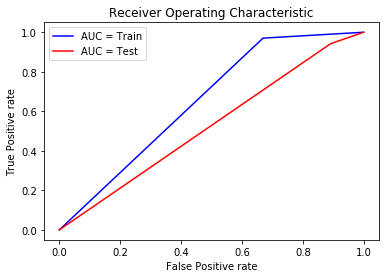

In [71]:
print("The most optimal value of alpha is %f" %(alpha))

clf = SGDClassifier(alpha=alpha,loss='hinge',penalty='l2',max_iter=1000)
clf.fit(X_train, y_train)
cali = CalibratedClassifierCV(base_estimator=clf,cv='prefit')
cali.fit(X_train,y_train)
pred_train = cali.predict(X_train)
pred_test = cali.predict(X_test)
acc = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
print('\nTest accuracy for alpha = %f is %f%%' % (alpha, acc))
roc_score_test = roc_auc_score(y_test,pred_test)
print('\n Test ROC Score is ',roc_score_test)
x.add_row(['TFIDF W2V','Linear SVM',alpha,"---","---",acc,roc_score_test])

fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test)

plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()



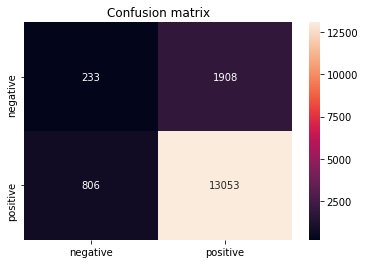

In [72]:
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")


### TFIDF Word To Vec on SVM RBF Kernel

In [73]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtrain = final['CleanedText'].values[0:30000]


i=0
list_of_sent=[]
for sent in datawtovtrain:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_train = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
W2VScoretrain=final['Score'].values[0:30000]


number of words that occured minimum 5 times  8131
sample words  ['littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'watch', 'realli', 'rosi', 'movi', 'incorpor', 'howev', 'miss', 'hard', 'cover', 'version', 'paperback', 'seem', 'kind', 'flimsi', 'take', 'two', 'hand', 'keep']


100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [01:10<00:00, 424.59it/s]


30000


In [74]:
#TFIDF WEIGHTED W2V
import warnings
warnings.filterwarnings("ignore")

datatfidftrain = final['CleanedText'].values[0:30000]

model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(datatfidftrain)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [75]:
import warnings
warnings.filterwarnings("ignore")
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names


tfidf_sent_vectors_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]

            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_train.append(sent_vec)
    row += 1
TFIDFW2VScoretrain=final['Score'].values[0:30000]

100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [00:54<00:00, 545.86it/s]


In [76]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtest = final['CleanedText'].values[30000:40000]


i=0
list_of_sent=[]
for sent in datawtovtest:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_test = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
W2VScoretest=final['Score'].values[30000:40000]



number of words that occured minimum 5 times  4179
sample words  ['dog', 'love', 'much', 'tip', 'bag', 'tri', 'finish', 'pack', 'caught', 'never', 'usual', 'treat', 'put', 'insid', 'everlast', 'ball', 'get', 'first', 'cooki', 'flavor', 'vari', 'doesnt', 'tire', 'bore', 'tast', 'also', 'divid', 'half', 'make', 'smaller', 'use', 'way', 'train', 'great', 'product', 'come', 'packag', 'foil', 'stay', 'fresh', 'long', 'period', 'time', 'keep', 'away', 'enough', 'buy', 'like', 'wish', 'came']


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1103.04it/s]


10000


In [77]:
#TFIDF WEIGHTED W2V
import warnings
warnings.filterwarnings("ignore")

datatfidftest = final['CleanedText'].values[30000:40000]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(datatfidftest)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [78]:
import warnings
warnings.filterwarnings("ignore")
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names


tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1
TFIDFW2VScoretest=final['Score'].values[30000:40000]


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:11<00:00, 868.01it/s]


In [79]:
import warnings
warnings.filterwarnings("ignore")
#Train Test Split of TFIDF W2V data
#creating the model with TFIDF W2V and brute force KNN
X_train = tfidf_sent_vectors_train
X_test = tfidf_sent_vectors_test
Y_train = TFIDFW2VScoretrain
Y_test = TFIDFW2VScoretest


In [80]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(Y_train)
y_test = pd.Series(Y_test)
y_train=y_train.map(z)
y_test = y_test.map(z)

In [81]:
gamma=[]
c=[]

for i in range(-4,4):
    c.append(10**i)
    gamma.append(10**i)

Best hyperparameter C is 10
Best hyperparameter gamma is 0.01

 Test ROC Score  is  0.5

 Test accuracy 83.540000%


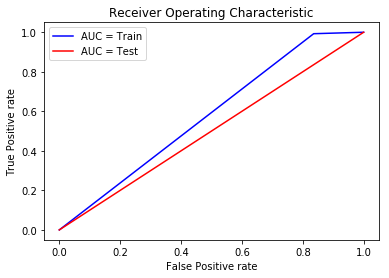

In [82]:
#Applying RBF Kernel on BOW

parameters = {'gamma':gamma, 'C':c}
svc=svm.SVC(kernel="rbf")
clf = GridSearchCV(svc, parameters, cv=2,scoring='roc_auc')
clf.fit(X_train, y_train)
param=clf.best_params_
pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)
roc_score_test = roc_auc_score(y_test,pred_test)

param = clf.best_params_
bestC= param['C']
bestgamma = param['gamma']
print ('Best hyperparameter C is',bestC)
print('Best hyperparameter gamma is',bestgamma)
print('\n Test ROC Score  is ',roc_score_test)

acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)

print('\n Test accuracy %f%%' %(acc))
x.add_row(['TFIDF W2V','RBF SVM',"---",bestC,bestgamma,acc,roc_score_test])

fpr1, tpr1, thresholds1 = roc_curve(y_train, pred_train)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_test)

plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()


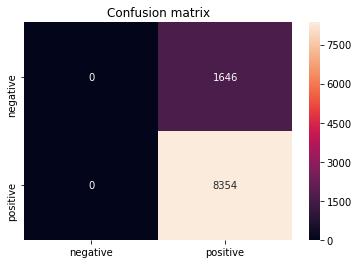

In [83]:
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

## CONCLUSION:

In [84]:
print(x)

+------------+------------+--------+-----+-------+-------------------+--------------------+
| Vectorizer |   Model    | alpha  |  C  | gamma |      Accuracy     |     ROC Score      |
+------------+------------+--------+-----+-------+-------------------+--------------------+
|    BOW     | Linear SVM | 0.0001 | --- |  ---  |      92.36875     | 0.813779376525148  |
|    BOW     |  RBF SVM   |  ---   |  1  |  0.01 | 87.05000000000001 | 0.630769712983005  |
|   TFIDF    | Linear SVM | 0.0001 | --- |  ---  | 86.11206896551724 | 0.7968524716729567 |
|   TFIDF    |  RBF SVM   |  ---   |  1  |   1   |       87.92       | 0.6662222766518379 |
|  AVG W2V   | Linear SVM |  0.01  | --- |  ---  |     75.015625     | 0.5472281908818173 |
|  AVG W2V   |  RBF SVM   |  ---   |  10 |  0.01 |        83.5       | 0.5024436602571916 |
| TFIDF W2V  | Linear SVM | 0.001  | --- |  ---  |     85.6953125    | 0.5253352482173584 |
| TFIDF W2V  |  RBF SVM   |  ---   |  10 |  0.01 |       83.54       |        0.